In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.insert(1, "../python/functions")
sys.path.insert(2, "../python/architecture")

In [3]:
from data_prep_functions import bike_prep
from model_functions import *
from plotting_functions import *
import no_gpu
import reproducible
from training_callback import BatchMSE

In [4]:
import time

In [5]:
X_train, X_test, y_train, y_test = bike_prep()

In [6]:
layers = 5
neurons = [64, 32, 32, 16, 1]
n_cols = X_train.shape[1]
batch_size = 32
epochs = 10

Epoch 1/10
462/462 [==============================] - 2s 5ms/step - loss: 28980.8086 - mse: 28980.8086 - val_loss: 12168.9023 - val_mse: 12168.9023
Epoch 2/10
462/462 [==============================] - 2s 4ms/step - loss: 8992.1709 - mse: 8992.1709 - val_loss: 8138.0312 - val_mse: 8138.0312
Epoch 3/10
462/462 [==============================] - 2s 4ms/step - loss: 7141.7832 - mse: 7141.7832 - val_loss: 6515.9771 - val_mse: 6515.9771
Epoch 4/10
462/462 [==============================] - 2s 4ms/step - loss: 5053.6572 - mse: 5053.6572 - val_loss: 3913.1035 - val_mse: 3913.1035
Epoch 5/10
462/462 [==============================] - 2s 4ms/step - loss: 3355.6260 - mse: 3355.6260 - val_loss: 2878.9084 - val_mse: 2878.9084
Epoch 6/10
462/462 [==============================] - 1s 2ms/step - loss: 2806.2971 - mse: 2806.2971 - val_loss: 2552.0847 - val_mse: 2552.0847
Epoch 7/10
462/462 [==============================] - 1s 3ms/step - loss: 2535.0874 - mse: 2535.0874 - val_loss: 2401.6812 - val_mse

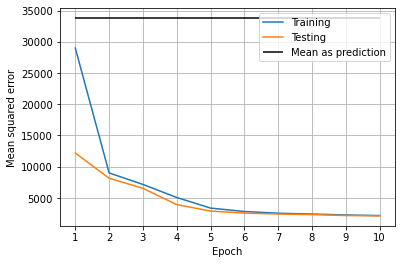

In [7]:
model = nn_model_structure(layers = layers,
                           neurons = neurons,
                           n_cols = n_cols,
                           classification = False)
model = nn_model_compile(model,
                         optimizer = "adam")
start_time = time.time()
model = nn_model_fit(model,
                     X_train,
                     y_train,
                     X_val = X_test,
                     y_val = y_test,
                     batch_size = batch_size,
                     epochs = epochs)
end_time = time.time()
print("Overall calculation took {} seconds.".format(end_time - start_time))
model.summary()
nn_plot_mse(model,
            mse_mean = mean_squared_error(y_test, np.ones(shape = (len(y_test),))*np.mean(y_test)))
# nn_save(model, "../models/model_test_small.h5")

In [8]:
model.trainable_weights

[<tf.Variable 'dense/kernel:0' shape=(53, 64) dtype=float32, numpy=
 array([[ 0.03122146, -0.5726783 ,  0.0648706 , ..., -0.41006052,
          0.1154447 , -0.30951628],
        [-0.05521201, -0.18551767,  0.02875507, ..., -0.11870093,
         -0.05087366, -0.04047558],
        [-0.38344395,  0.0912939 ,  0.18204273, ...,  0.00952543,
         -0.08452826,  1.1686977 ],
        ...,
        [-0.09877027,  0.0454619 , -0.00582151, ..., -0.12964319,
          0.28082442, -0.06433252],
        [ 0.1031141 ,  0.04453314, -0.03140609, ..., -0.1508472 ,
         -0.18622667, -0.47129235],
        [-0.28979626,  0.10165071,  0.25020394, ..., -0.09552792,
         -0.2016004 ,  0.1839614 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(64,) dtype=float32, numpy=
 array([ 0.15465833, -0.056843  ,  0.07320283,  0.06729426,  0.00676188,
         0.0223912 ,  0.02490703, -0.10043845, -0.14509441, -0.0768417 ,
         0.02653138,  0.05662951,  0.08753242,  0.15805136,  0.01973512,
       

In [9]:
model.history.history

{'loss': [28980.80859375,
  8992.1708984375,
  7141.783203125,
  5053.6572265625,
  3355.6259765625,
  2806.297119140625,
  2535.08740234375,
  2403.518310546875,
  2251.83203125,
  2160.8583984375],
 'mse': [28980.80859375,
  8992.1708984375,
  7141.783203125,
  5053.6572265625,
  3355.6259765625,
  2806.297119140625,
  2535.08740234375,
  2403.518310546875,
  2251.83203125,
  2160.8583984375],
 'val_loss': [12168.90234375,
  8138.03125,
  6515.97705078125,
  3913.103515625,
  2878.908447265625,
  2552.084716796875,
  2401.68115234375,
  2312.374755859375,
  2163.510986328125,
  2102.10791015625],
 'val_mse': [12168.90234375,
  8138.03125,
  6515.97705078125,
  3913.103515625,
  2878.908447265625,
  2552.084716796875,
  2401.68115234375,
  2312.374755859375,
  2163.510986328125,
  2102.10791015625]}

In [10]:
model.evaluate(X_test, y_test)

82/82 [==============================] - 0s 2ms/step - loss: 2102.1079 - mse: 2102.1079


[2102.10791015625, 2102.10791015625]

In [11]:
weights = model.get_weights()
print(weights)

[array([[ 0.03122146, -0.5726783 ,  0.0648706 , ..., -0.41006052,
         0.1154447 , -0.30951628],
       [-0.05521201, -0.18551767,  0.02875507, ..., -0.11870093,
        -0.05087366, -0.04047558],
       [-0.38344395,  0.0912939 ,  0.18204273, ...,  0.00952543,
        -0.08452826,  1.1686977 ],
       ...,
       [-0.09877027,  0.0454619 , -0.00582151, ..., -0.12964319,
         0.28082442, -0.06433252],
       [ 0.1031141 ,  0.04453314, -0.03140609, ..., -0.1508472 ,
        -0.18622667, -0.47129235],
       [-0.28979626,  0.10165071,  0.25020394, ..., -0.09552792,
        -0.2016004 ,  0.1839614 ]], dtype=float32), array([ 0.15465833, -0.056843  ,  0.07320283,  0.06729426,  0.00676188,
        0.0223912 ,  0.02490703, -0.10043845, -0.14509441, -0.0768417 ,
        0.02653138,  0.05662951,  0.08753242,  0.15805136,  0.01973512,
        0.10446447, -0.09332499,  0.04778973, -0.06435893,  0.02356809,
       -0.1859132 , -0.04742761, -0.32157207, -0.08804648, -0.08586689,
        0.

In [12]:
model.predict(X_test)

array([[250.35974 ],
       [121.3014  ],
       [ 98.70002 ],
       ...,
       [ 18.518784],
       [ 48.85591 ],
       [ 12.630455]], dtype=float32)

In [13]:
y_true, y_pred = nn_mse_pred_true(model, X_test, y_test, print_comp = True)

Prediction: 250.3597412109375, Actual: 254
Prediction: 121.30139923095703, Actual: 114
Prediction: 98.70001983642578, Actual: 70
Prediction: 156.99267578125, Actual: 148
Prediction: 175.2735595703125, Actual: 163
Prediction: 464.9516296386719, Actual: 578
Prediction: 465.0635070800781, Actual: 573
Prediction: 19.576623916625977, Actual: 32
Prediction: 309.8843078613281, Actual: 297
Prediction: 114.36534881591797, Actual: 123
Prediction: 131.5478973388672, Actual: 92
Prediction: 449.0473327636719, Actual: 522
Prediction: 291.2594299316406, Actual: 386
Prediction: 366.1069030761719, Actual: 370
Prediction: 173.8004608154297, Actual: 126
Prediction: 306.3073425292969, Actual: 296
Prediction: 120.90935516357422, Actual: 89
Prediction: 17.36322593688965, Actual: 23
Prediction: 211.02577209472656, Actual: 331
Prediction: 118.9103012084961, Actual: 170
Prediction: 219.0055694580078, Actual: 291
Prediction: 171.64166259765625, Actual: 187
Prediction: 11.43697738647461, Actual: 14
Prediction: 1

Prediction: 369.3096008300781, Actual: 328
Prediction: 3.4187400341033936, Actual: 12
Prediction: 55.5460319519043, Actual: 52
Prediction: 143.0763702392578, Actual: 167
Prediction: 2.6676557064056396, Actual: 7
Prediction: 8.878558158874512, Actual: 9
Prediction: 1.9408519268035889, Actual: 4
Prediction: 11.458918571472168, Actual: 16
Prediction: 14.133928298950195, Actual: 14
Prediction: 157.00062561035156, Actual: 170
Prediction: 133.12405395507812, Actual: 143
Prediction: 101.09062957763672, Actual: 114
Prediction: 172.3529815673828, Actual: 135
Prediction: 9.96764087677002, Actual: 4
Prediction: 11.254109382629395, Actual: 18
Prediction: 117.28185272216797, Actual: 72
Prediction: 36.975502014160156, Actual: 53
Prediction: 215.3419952392578, Actual: 242
Prediction: 13.018482208251953, Actual: 14
Prediction: 212.18704223632812, Actual: 138
Prediction: 79.91410064697266, Actual: 155
Prediction: 37.65715408325195, Actual: 50
Prediction: 200.69168090820312, Actual: 239
Prediction: 538.

In [14]:
true_mse = model.evaluate(X_test, y_test)[1]
print(true_mse)
print(model.predict(X_test[:3]))

shape_0 = model.get_weights()[0].shape
print(shape_0)

old_first_weights = model.get_weights()[0]

# first_weights = [np.random.normal(size = shape_0)]
first_weights = [model.get_weights()[0]*0.75]
print(first_weights)
print(first_weights[0].shape)

all_weights = first_weights + model.get_weights()[1:]
# print(all_weights)

model.set_weights(all_weights)

fake_mse = model.evaluate(X_test, y_test)[1]
print(fake_mse)
print(model.predict(X_test[:3]))

old_weights = [old_first_weights] + model.get_weights()[1:]

model.set_weights(old_weights)

old_true_mse = model.evaluate(X_test, y_test)[1]
print(old_true_mse)
print(model.predict(X_test[:3]))

82/82 [==============================] - 0s 2ms/step - loss: 2102.1079 - mse: 2102.1079
2102.10791015625
[[250.35971 ]
 [121.301414]
 [ 98.70003 ]]
(53, 64)
[array([[ 0.02341609, -0.42950875,  0.04865295, ..., -0.3075454 ,
         0.08658352, -0.2321372 ],
       [-0.04140901, -0.13913825,  0.02156631, ..., -0.0890257 ,
        -0.03815525, -0.03035668],
       [-0.28758296,  0.06847043,  0.13653205, ...,  0.00714407,
        -0.06339619,  0.87652326],
       ...,
       [-0.0740777 ,  0.03409643, -0.00436613, ..., -0.09723239,
         0.21061832, -0.04824939],
       [ 0.07733557,  0.03339986, -0.02355457, ..., -0.1131354 ,
        -0.13967   , -0.35346925],
       [-0.2173472 ,  0.07623804,  0.18765295, ..., -0.07164594,
        -0.1512003 ,  0.13797106]], dtype=float32)]
(53, 64)
82/82 [==============================] - 0s 3ms/step - loss: 7093.0542 - mse: 7093.0542
7093.05419921875
[[198.72984]
 [ 98.33722]
 [ 87.55596]]
82/82 [==============================] - 0s 3ms/step - loss

Epoch 1/2
30/30 [==============================] - 23s 750ms/step - loss: 67967.3516 - mse: 67967.3516 - val_loss: 68986.2969 - val_mse: 68986.2969
Epoch 2/2
10/30 [=========>....................] - ETA: 12s - loss: 67888.8125 - mse: 67888.8125WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.715117). Check your callbacks.


30/30 [==============================] - 22s 733ms/step - loss: 69158.5625 - mse: 69158.5625 - val_loss: 68986.2969 - val_mse: 68986.2969
Overall calculation took 46.91323781013489 seconds.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3456      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 7,137
Trainable params: 7,137
Non-trainable params

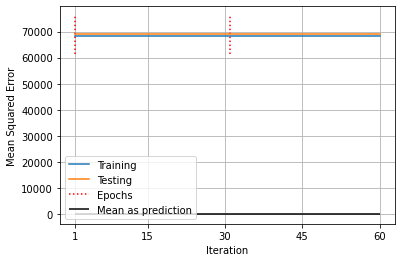

In [15]:
model = nn_model_structure(layers = layers,
                           neurons = neurons,
                           n_cols = n_cols)
model = nn_model_compile(model,
                         optimizer = "adam")
train_mse = BatchMSE((X_train,
                      y_train))
test_mse = BatchMSE((X_test,
                     y_test))
start_time = time.time()
model = nn_model_fit(model,
                     X_train = X_train,
                     y_train = y_train,
                     X_val = X_test,
                     y_val = y_test,
                     batch_size = 500,                            # change to batch_size
                     epochs = 2,                                  # change to epochs
                     callbacks = [train_mse, test_mse]
                     )
end_time = time.time()
print("Overall calculation took {} seconds.".format(end_time - start_time))
model.summary()
iteration_list = []
for epoch in range(2):                                             # change to epochs
    for b in range(int(np.ceil(len(X_train) / 500))):              # change 500 to batch_size                        
        iteration_list.append("Epoch: {}, Batch: {}.".format(epoch+1, b+1))
nn_plot_iter_mse(train_mse.mse,
                 test_mse.mse,
                 iteration_list,
                 mse_mean = 1 / len(y_train))